In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
from pandas import DataFrame, Series
from math import isnan
import matplotlib.pyplot as plt
import matplotlib
import datetime
# Numpy options
np.random.seed(78)
# Pandas options
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 400)
# Matplotlib options
matplotlib.rcParams['image.cmap'] = 'viridis'
%matplotlib inline
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (20,10)

In [3]:
aadt = pd.read_csv('aadt_counts_sep.csv', low_memory=False)
aadt.head()

,Latitude,Longitude,Counts
0,40.598310,-73.985797,3812
1,40.597848,-74.046164,11963
2,40.675265,-73.865689,28963
3,40.623325,-74.113503,8760
4,40.760473,-73.961751,13106


In [4]:
aadt['Lat'] = aadt['Latitude'].round(2)
aadt['Long'] = aadt['Longitude'].round(2)

for x in range (0,len(aadt)):
    aadt.set_value(x, 'LOCATION', "(" + str(aadt.at[x, 'Lat']) + "," + str(aadt.at[x, 'Long']) + ")")
aadt = aadt[['Latitude','Longitude','Lat','Long','LOCATION','Counts']]
aadt = aadt.reset_index(drop=True)
aadt.head()

,Latitude,Longitude,Lat,Long,LOCATION,Counts
0,40.598310,-73.985797,40.60,-73.99,"(40.6,-73.99)",3812
1,40.597848,-74.046164,40.60,-74.05,"(40.6,-74.05)",11963
2,40.675265,-73.865689,40.68,-73.87,"(40.68,-73.87)",28963
3,40.623325,-74.113503,40.62,-74.11,"(40.62,-74.11)",8760
4,40.760473,-73.961751,40.76,-73.96,"(40.76,-73.96)",13106


In [13]:
collisions = pd.read_csv('bike_coll_rate.csv', low_memory=False)

In [5]:
collisions = collisions[pd.notnull(collisions['LOCATION'])]
collisions = collisions[collisions['LATITUDE'] > 40.45]
collisions = collisions[collisions['LATITUDE'] < 40.95]
collisions = collisions[collisions['LONGITUDE'] > -74.3]
collisions = collisions[collisions['LONGITUDE'] < -73.69]
collisions = collisions.reset_index(drop=True)
collisions['LONG'] = collisions['LONGITUDE'].round(2)
collisions['LAT'] = collisions['LATITUDE'].round(2)

In [14]:
for x in range (0,len(collisions)):
    collisions.set_value(x, 'LOCATION', "(" + str(collisions.at[x, 'LAT']) + "," + str(collisions.at[x, 'LONG']) + ")")
collisions.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Counts,Collision Rate,LAT,LONG
0,03/24/2017,11:00,BROOKLYN,11235.0,40.587780,-73.95238,"(40.59,-73.95)",NaN,NaN,2615 EAST 17 STREET,1,0,0,0,1,0,0,0,Turning Improperly,Unspecified,NaN,NaN,NaN,3639488,BICYCLE,PASSENGER VEHICLE,NaN,NaN,NaN,156425.0,0.003503,40.59,-73.95
1,03/24/2017,15:45,BROOKLYN,11238.0,40.679420,-73.96823,"(40.68,-73.97)",VANDERBILT AVENUE,BERGEN STREET,NaN,0,0,0,0,0,0,0,0,Unsafe Lane Changing,Unspecified,NaN,NaN,NaN,3639696,PASSENGER VEHICLE,BICYCLE,NaN,NaN,NaN,9874.0,0.055494,40.68,-73.97
2,03/24/2017,16:50,BRONX,10467.0,40.880780,-73.88347,"(40.88,-73.88)",JEROME AVENUE,EAST 208 STREET,NaN,1,0,0,0,1,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3638752,BICYCLE,NaN,NaN,NaN,NaN,2909.0,0.188362,40.88,-73.88
3,03/24/2017,18:40,MANHATTAN,10002.0,40.713688,-73.99459,"(40.71,-73.99)",EAST BROADWAY,MARKET STREET,NaN,1,0,1,0,0,0,0,0,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,3639287,BICYCLE,NaN,NaN,NaN,NaN,24005.0,0.022826,40.71,-73.99
4,03/24/2017,19:05,MANHATTAN,10037.0,40.814670,-73.93623,"(40.81,-73.94)",5 AVENUE,EAST 138 STREET,NaN,1,0,1,0,0,0,0,0,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,NaN,NaN,NaN,NaN,3638488,BICYCLE,NaN,NaN,NaN,NaN,11984.0,0.045723,40.81,-73.94


In [15]:
len(collisions)

21185

In [16]:
len(collisions[collisions['LOCATION'].isin(aadt['LOCATION'])])

19643

In [17]:
collisions = collisions.drop('Counts', 1)

In [19]:
collisions.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Collision Rate,LAT,LONG
0,03/24/2017,11:00,BROOKLYN,11235.0,40.587780,-73.95238,"(40.59,-73.95)",NaN,NaN,2615 EAST 17 STREET,1,0,0,0,1,0,0,0,Turning Improperly,Unspecified,NaN,NaN,NaN,3639488,BICYCLE,PASSENGER VEHICLE,NaN,NaN,NaN,0.003503,40.59,-73.95
1,03/24/2017,15:45,BROOKLYN,11238.0,40.679420,-73.96823,"(40.68,-73.97)",VANDERBILT AVENUE,BERGEN STREET,NaN,0,0,0,0,0,0,0,0,Unsafe Lane Changing,Unspecified,NaN,NaN,NaN,3639696,PASSENGER VEHICLE,BICYCLE,NaN,NaN,NaN,0.055494,40.68,-73.97
2,03/24/2017,16:50,BRONX,10467.0,40.880780,-73.88347,"(40.88,-73.88)",JEROME AVENUE,EAST 208 STREET,NaN,1,0,0,0,1,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3638752,BICYCLE,NaN,NaN,NaN,NaN,0.188362,40.88,-73.88
3,03/24/2017,18:40,MANHATTAN,10002.0,40.713688,-73.99459,"(40.71,-73.99)",EAST BROADWAY,MARKET STREET,NaN,1,0,1,0,0,0,0,0,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,3639287,BICYCLE,NaN,NaN,NaN,NaN,0.022826,40.71,-73.99
4,03/24/2017,19:05,MANHATTAN,10037.0,40.814670,-73.93623,"(40.81,-73.94)",5 AVENUE,EAST 138 STREET,NaN,1,0,1,0,0,0,0,0,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,NaN,NaN,NaN,NaN,3638488,BICYCLE,NaN,NaN,NaN,NaN,0.045723,40.81,-73.94


In [20]:
df = pd.merge(collisions, aadt, on='LOCATION' , how='left')

In [21]:
df.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Collision Rate,LAT,LONG,Latitude,Longitude,Lat,Long,Counts
0,03/24/2017,11:00,BROOKLYN,11235.0,40.58778,-73.95238,"(40.59,-73.95)",NaN,NaN,2615 EAST 17 STREET,1,0,0,0,1,0,0,0,Turning Improperly,Unspecified,NaN,NaN,NaN,3639488,BICYCLE,PASSENGER VEHICLE,NaN,NaN,NaN,0.003503,40.59,-73.95,40.589095,-73.952886,40.59,-73.95,8608.0
1,03/24/2017,11:00,BROOKLYN,11235.0,40.58778,-73.95238,"(40.59,-73.95)",NaN,NaN,2615 EAST 17 STREET,1,0,0,0,1,0,0,0,Turning Improperly,Unspecified,NaN,NaN,NaN,3639488,BICYCLE,PASSENGER VEHICLE,NaN,NaN,NaN,0.003503,40.59,-73.95,40.585311,-73.954428,40.59,-73.95,156425.0
2,03/24/2017,15:45,BROOKLYN,11238.0,40.67942,-73.96823,"(40.68,-73.97)",VANDERBILT AVENUE,BERGEN STREET,NaN,0,0,0,0,0,0,0,0,Unsafe Lane Changing,Unspecified,NaN,NaN,NaN,3639696,PASSENGER VEHICLE,BICYCLE,NaN,NaN,NaN,0.055494,40.68,-73.97,40.678446,-73.968799,40.68,-73.97,12991.0
3,03/24/2017,15:45,BROOKLYN,11238.0,40.67942,-73.96823,"(40.68,-73.97)",VANDERBILT AVENUE,BERGEN STREET,NaN,0,0,0,0,0,0,0,0,Unsafe Lane Changing,Unspecified,NaN,NaN,NaN,3639696,PASSENGER VEHICLE,BICYCLE,NaN,NaN,NaN,0.055494,40.68,-73.97,40.675021,-73.971115,40.68,-73.97,16131.0
4,03/24/2017,15:45,BROOKLYN,11238.0,40.67942,-73.96823,"(40.68,-73.97)",VANDERBILT AVENUE,BERGEN STREET,NaN,0,0,0,0,0,0,0,0,Unsafe Lane Changing,Unspecified,NaN,NaN,NaN,3639696,PASSENGER VEHICLE,BICYCLE,NaN,NaN,NaN,0.055494,40.68,-73.97,40.678503,-73.973687,40.68,-73.97,12719.0


In [22]:
#df = df[df['Counts'].notnull()]
df['Counts'] = df['Counts'].replace(to_replace='NaN', value=df['Counts'].mean())

In [23]:
df = df.drop_duplicates(df.columns[0:31], keep='last')

In [24]:
len(df)

21185

In [25]:
df = df.reset_index(drop=True)

In [26]:
for x in range (0,len(df)):
    df.set_value(x, 'LOCATION', "(" + str(df.at[x, 'LATITUDE']) + "," + str(df.at[x, 'LONGITUDE']) + ")")
df.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Collision Rate,LAT,LONG,Latitude,Longitude,Lat,Long,Counts
0,03/24/2017,11:00,BROOKLYN,11235.0,40.587780,-73.95238,"(40.58778,-73.95238)",NaN,NaN,2615 EAST 17 STREET,1,0,0,0,1,0,0,0,Turning Improperly,Unspecified,NaN,NaN,NaN,3639488,BICYCLE,PASSENGER VEHICLE,NaN,NaN,NaN,0.003503,40.59,-73.95,40.585311,-73.954428,40.59,-73.95,156425.0
1,03/24/2017,15:45,BROOKLYN,11238.0,40.679420,-73.96823,"(40.67942,-73.96823)",VANDERBILT AVENUE,BERGEN STREET,NaN,0,0,0,0,0,0,0,0,Unsafe Lane Changing,Unspecified,NaN,NaN,NaN,3639696,PASSENGER VEHICLE,BICYCLE,NaN,NaN,NaN,0.055494,40.68,-73.97,40.678171,-73.968946,40.68,-73.97,9874.0
2,03/24/2017,16:50,BRONX,10467.0,40.880780,-73.88347,"(40.88078,-73.88347)",JEROME AVENUE,EAST 208 STREET,NaN,1,0,0,0,1,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3638752,BICYCLE,NaN,NaN,NaN,NaN,0.188362,40.88,-73.88,40.881727,-73.882789,40.88,-73.88,2909.0
3,03/24/2017,18:40,MANHATTAN,10002.0,40.713688,-73.99459,"(40.713688,-73.99459)",EAST BROADWAY,MARKET STREET,NaN,1,0,1,0,0,0,0,0,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,3639287,BICYCLE,NaN,NaN,NaN,NaN,0.022826,40.71,-73.99,40.714069,-73.990197,40.71,-73.99,24005.0
4,03/24/2017,19:05,MANHATTAN,10037.0,40.814670,-73.93623,"(40.81467,-73.93623)",5 AVENUE,EAST 138 STREET,NaN,1,0,1,0,0,0,0,0,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,NaN,NaN,NaN,NaN,3638488,BICYCLE,NaN,NaN,NaN,NaN,0.045723,40.81,-73.94,40.806926,-73.935565,40.81,-73.94,11984.0


In [27]:
counts = df.groupby('LOCATION').count()
counts.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Collision Rate,LAT,LONG,Latitude,Longitude,Lat,Long,Counts
LOCATION,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"(40.5105181,-74.2482769)",1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1,1
"(40.5214301,-74.1982316)",1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,0,1
"(40.5239568,-74.2156736)",1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1,1
"(40.5262662,-74.2015265)",1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1,1
"(40.5279085,-74.1648546)",1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1,1


In [28]:
for x in range (0,len(df)):
    df.at[x,'Collision Rate'] = (counts.at[df.at[x,'LOCATION'],'DATE']*1000000)/(df.at[x,'Counts']*365*5)

In [29]:
df.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Collision Rate,LAT,LONG,Latitude,Longitude,Lat,Long,Counts
0,03/24/2017,11:00,BROOKLYN,11235.0,40.587780,-73.95238,"(40.58778,-73.95238)",NaN,NaN,2615 EAST 17 STREET,1,0,0,0,1,0,0,0,Turning Improperly,Unspecified,NaN,NaN,NaN,3639488,BICYCLE,PASSENGER VEHICLE,NaN,NaN,NaN,0.003503,40.59,-73.95,40.585311,-73.954428,40.59,-73.95,156425.0
1,03/24/2017,15:45,BROOKLYN,11238.0,40.679420,-73.96823,"(40.67942,-73.96823)",VANDERBILT AVENUE,BERGEN STREET,NaN,0,0,0,0,0,0,0,0,Unsafe Lane Changing,Unspecified,NaN,NaN,NaN,3639696,PASSENGER VEHICLE,BICYCLE,NaN,NaN,NaN,0.055494,40.68,-73.97,40.678171,-73.968946,40.68,-73.97,9874.0
2,03/24/2017,16:50,BRONX,10467.0,40.880780,-73.88347,"(40.88078,-73.88347)",JEROME AVENUE,EAST 208 STREET,NaN,1,0,0,0,1,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3638752,BICYCLE,NaN,NaN,NaN,NaN,0.188362,40.88,-73.88,40.881727,-73.882789,40.88,-73.88,2909.0
3,03/24/2017,18:40,MANHATTAN,10002.0,40.713688,-73.99459,"(40.713688,-73.99459)",EAST BROADWAY,MARKET STREET,NaN,1,0,1,0,0,0,0,0,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,3639287,BICYCLE,NaN,NaN,NaN,NaN,0.022826,40.71,-73.99,40.714069,-73.990197,40.71,-73.99,24005.0
4,03/24/2017,19:05,MANHATTAN,10037.0,40.814670,-73.93623,"(40.81467,-73.93623)",5 AVENUE,EAST 138 STREET,NaN,1,0,1,0,0,0,0,0,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,NaN,NaN,NaN,NaN,3638488,BICYCLE,NaN,NaN,NaN,NaN,0.045723,40.81,-73.94,40.806926,-73.935565,40.81,-73.94,11984.0


In [30]:
print(df['Collision Rate'].max())
print(df['Collision Rate'].min())

18.9290161893
0.00314558515158


In [31]:
len(df[df['Collision Rate'].isnull()])

0

In [32]:
df = df.drop(df.columns[30:36], axis=1)

In [33]:
df.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Collision Rate,Counts
0,03/24/2017,11:00,BROOKLYN,11235.0,40.587780,-73.95238,"(40.58778,-73.95238)",NaN,NaN,2615 EAST 17 STREET,1,0,0,0,1,0,0,0,Turning Improperly,Unspecified,NaN,NaN,NaN,3639488,BICYCLE,PASSENGER VEHICLE,NaN,NaN,NaN,0.003503,156425.0
1,03/24/2017,15:45,BROOKLYN,11238.0,40.679420,-73.96823,"(40.67942,-73.96823)",VANDERBILT AVENUE,BERGEN STREET,NaN,0,0,0,0,0,0,0,0,Unsafe Lane Changing,Unspecified,NaN,NaN,NaN,3639696,PASSENGER VEHICLE,BICYCLE,NaN,NaN,NaN,0.055494,9874.0
2,03/24/2017,16:50,BRONX,10467.0,40.880780,-73.88347,"(40.88078,-73.88347)",JEROME AVENUE,EAST 208 STREET,NaN,1,0,0,0,1,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3638752,BICYCLE,NaN,NaN,NaN,NaN,0.188362,2909.0
3,03/24/2017,18:40,MANHATTAN,10002.0,40.713688,-73.99459,"(40.713688,-73.99459)",EAST BROADWAY,MARKET STREET,NaN,1,0,1,0,0,0,0,0,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,3639287,BICYCLE,NaN,NaN,NaN,NaN,0.022826,24005.0
4,03/24/2017,19:05,MANHATTAN,10037.0,40.814670,-73.93623,"(40.81467,-73.93623)",5 AVENUE,EAST 138 STREET,NaN,1,0,1,0,0,0,0,0,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,NaN,NaN,NaN,NaN,3638488,BICYCLE,NaN,NaN,NaN,NaN,0.045723,11984.0


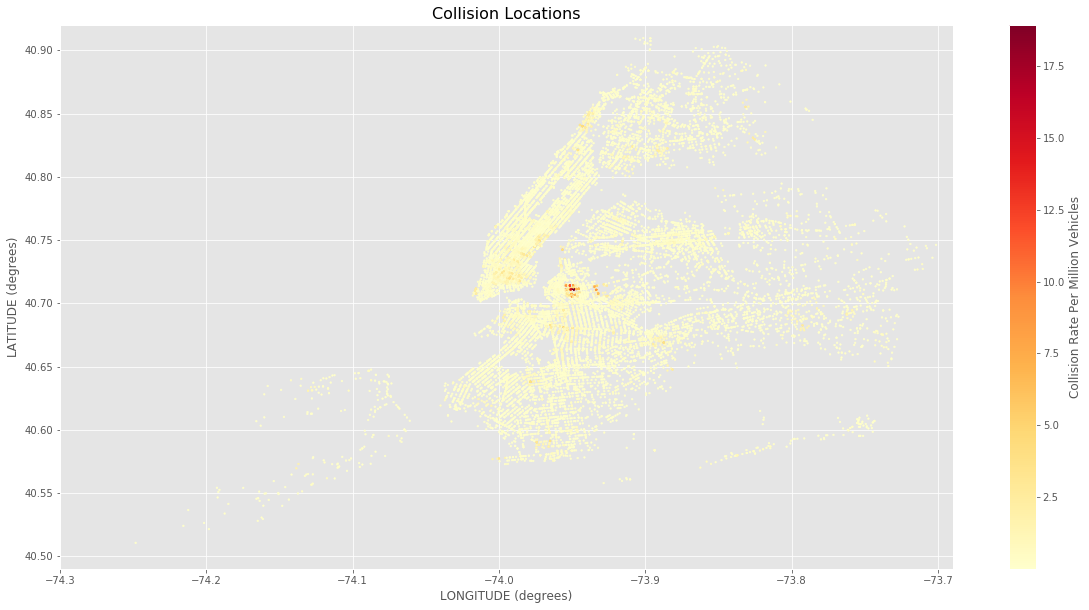

In [35]:
plt.scatter(df['LONGITUDE'], df['LATITUDE'], c=df['Collision Rate'], s=3, cmap=plt.cm.YlOrRd)
plt.xlabel('LONGITUDE (degrees)', fontsize=12)
plt.ylabel('LATITUDE (degrees)', fontsize=12)
plt.title('Collision Locations', fontsize=16)
plt.ylim(40.49,40.92)
plt.xlim(-74.3,-73.69)
plt.colorbar(label='Collision Rate Per Million Vehicles')
plt.show()

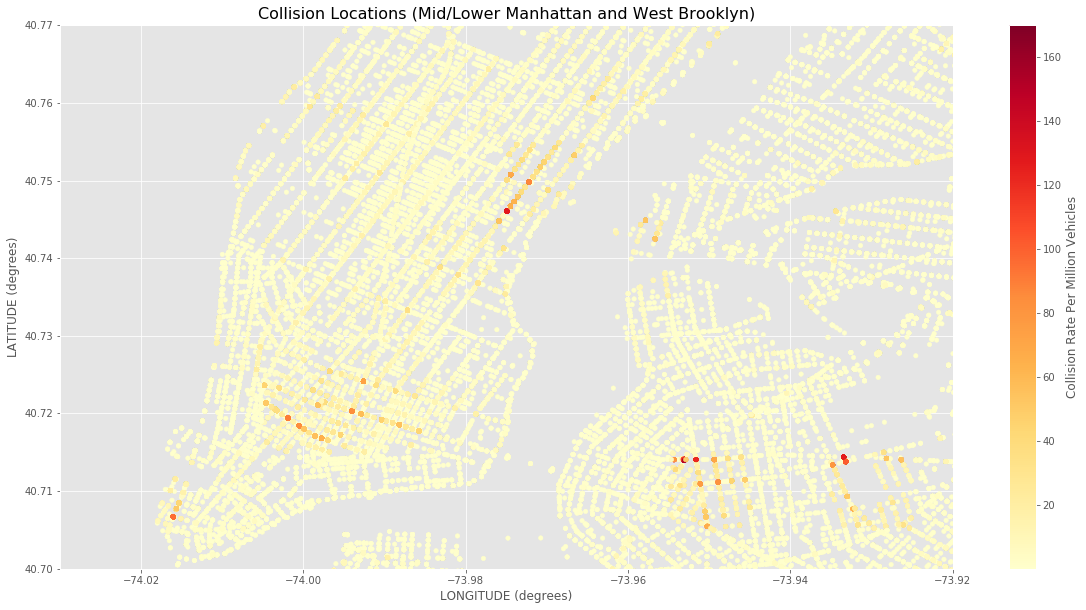

In [108]:
plt.scatter(df['LONGITUDE'], df['LATITUDE'], c=df['Collision Rate'], s=20, cmap=plt.cm.YlOrRd)
plt.xlabel('LONGITUDE (degrees)', fontsize=12)
plt.ylabel('LATITUDE (degrees)', fontsize=12)
plt.title('Collision Locations (Mid/Lower Manhattan and West Brooklyn)', fontsize=16)
plt.ylim(40.7,40.77)
plt.xlim(-74.03,-73.92)
plt.colorbar(label='Collision Rate Per Million Vehicles')
plt.show()

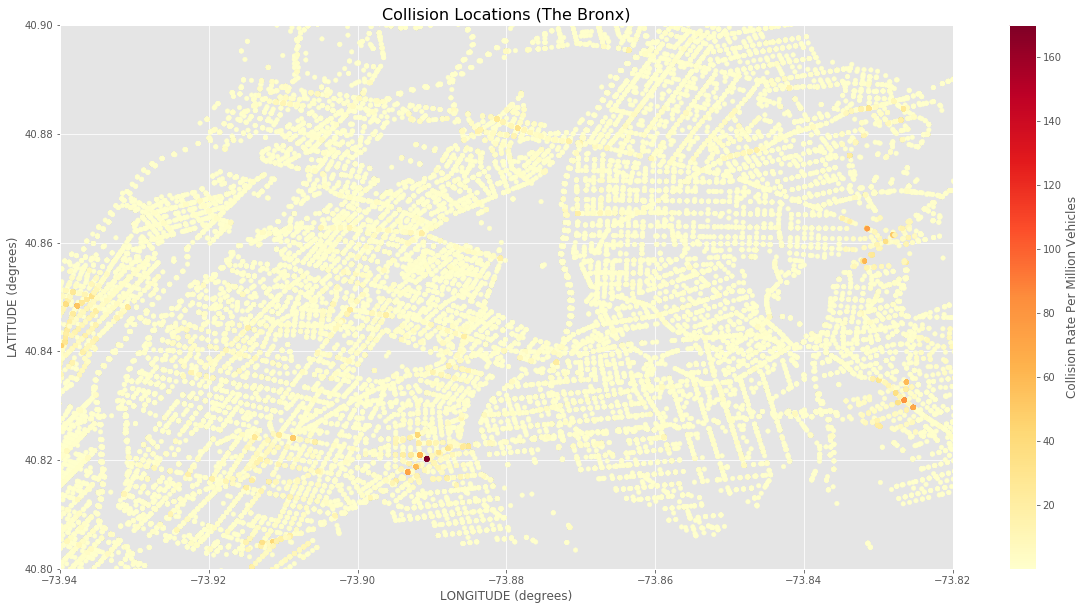

In [109]:
plt.scatter(df['LONGITUDE'], df['LATITUDE'], c=df['Collision Rate'], s=20, cmap=plt.cm.YlOrRd)
plt.xlabel('LONGITUDE (degrees)', fontsize=12)
plt.ylabel('LATITUDE (degrees)', fontsize=12)
plt.title('Collision Locations (The Bronx)', fontsize=16)
plt.ylim(40.8,40.9)
plt.xlim(-73.94,-73.82)
plt.colorbar(label='Collision Rate Per Million Vehicles')
plt.show()

In [97]:
danger_areas = df[df['Collision Rate'] >= 40]

In [98]:
len(danger_areas)

15273

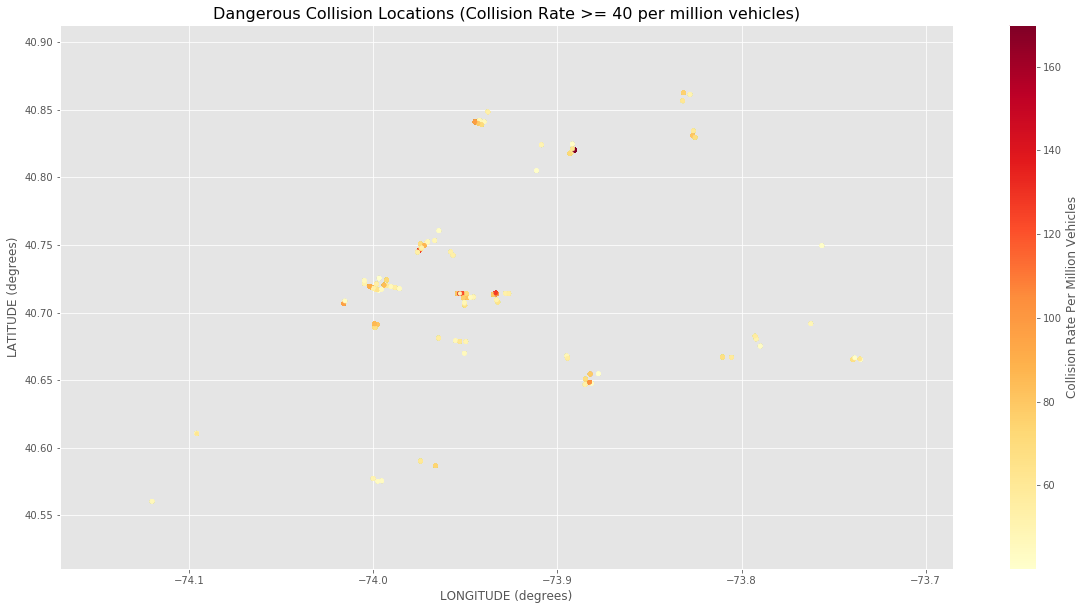

In [100]:
plt.scatter(danger_areas['LONGITUDE'], danger_areas['LATITUDE'], c=danger_areas['Collision Rate'], s=15, cmap=plt.cm.YlOrRd)
plt.xlabel('LONGITUDE (degrees)', fontsize=12)
plt.ylabel('LATITUDE (degrees)', fontsize=12)
plt.title('Dangerous Collision Locations (Collision Rate >= 40 per million vehicles)', fontsize=16)
plt.ylim(danger_areas['LATITUDE'].min()-.05,danger_areas['LATITUDE'].max()+.05)
plt.xlim(danger_areas['LONGITUDE'].min()-.05,danger_areas['LONGITUDE'].max()+.05)
plt.colorbar(label='Collision Rate Per Million Vehicles')
plt.show()

In [89]:
danger_areas = df[df['Collision Rate'] >= 160]

In [90]:
len(danger_areas)

405

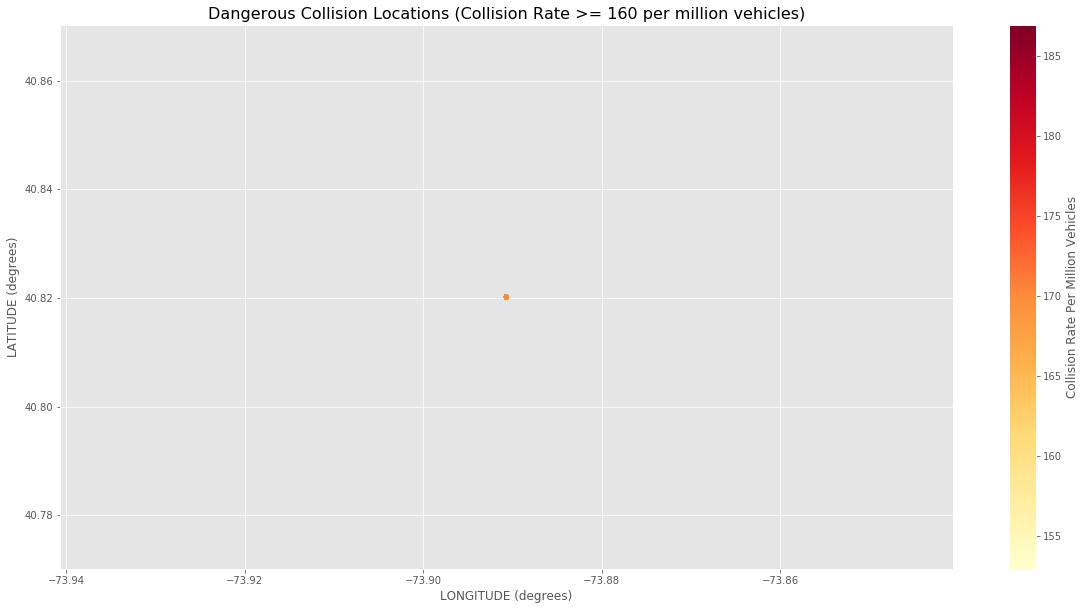

In [93]:
plt.scatter(danger_areas['LONGITUDE'], danger_areas['LATITUDE'], c=danger_areas['Collision Rate'], s=20, cmap=plt.cm.YlOrRd)
plt.xlabel('LONGITUDE (degrees)', fontsize=12)
plt.ylabel('LATITUDE (degrees)', fontsize=12)
plt.title('Dangerous Collision Locations (Collision Rate >= 160 per million vehicles)', fontsize=16)
plt.ylim(danger_areas['LATITUDE'].min()-.05,danger_areas['LATITUDE'].max()+.05)
plt.xlim(danger_areas['LONGITUDE'].min()-.05,danger_areas['LONGITUDE'].max()+.05)
plt.colorbar(label='Collision Rate Per Million Vehicles')
plt.show()

In [94]:
danger_areas.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Counts,Collision Rate
35941,01/16/2017,10:00,BRONX,10459,40.820189,-73.890675,"(40.820189,-73.8906752)",BRUCKNER BOULEVARD,HUNTS POINT AVENUE,NaN,0,0,0,0,0,0,0,0,Passing or Lane Usage Improper,Passing or Lane Usage Improper,NaN,NaN,NaN,3599580,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,1306.0,169.921752
41231,01/04/2017,7:20,BRONX,10459,40.820189,-73.890675,"(40.820189,-73.8906752)",BRUCKNER BOULEVARD,HUNTS POINT AVENUE,NaN,0,0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,3592104,SPORT UTILITY / STATION WAGON,PICK-UP TRUCK,NaN,NaN,NaN,1306.0,169.921752
42134,01/01/2017,20:47,BRONX,10459,40.820189,-73.890675,"(40.820189,-73.8906752)",BRUCKNER BOULEVARD,HUNTS POINT AVENUE,NaN,0,0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,3591324,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,1306.0,169.921752
42668,12/30/2016,13:00,BRONX,10459,40.820189,-73.890675,"(40.820189,-73.8906752)",HUNTS POINT AVENUE,BRUCKNER BOULEVARD,NaN,0,0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,3589732,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,1306.0,169.921752
45228,12/23/2016,14:50,BRONX,10459,40.820189,-73.890675,"(40.820189,-73.8906752)",HUNTS POINT AVENUE,BRUCKNER BOULEVARD,NaN,0,0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,3586447,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,1306.0,169.921752


In [95]:
len(danger_areas[danger_areas['LOCATION'] != '(40.820189,-73.8906752)'])

0

Hunts Point Ave and Bruckner Boulevard is our most dangerous intersection after normalization.

In [80]:
df.to_csv('collisions_w_rate.csv')

In [313]:
causes = danger_areas[danger_areas.columns[18:23]]

In [314]:
causes = causes.apply(pd.Series.value_counts)

In [315]:
causes['CONTRIBUTING FACTOR VEHICLE 1'] = causes['CONTRIBUTING FACTOR VEHICLE 1'].replace(to_replace='NaN', value=0)
causes['CONTRIBUTING FACTOR VEHICLE 2'] = causes['CONTRIBUTING FACTOR VEHICLE 2'].replace(to_replace='NaN', value=0)
causes['CONTRIBUTING FACTOR VEHICLE 3'] = causes['CONTRIBUTING FACTOR VEHICLE 3'].replace(to_replace='NaN', value=0)
causes['CONTRIBUTING FACTOR VEHICLE 4'] = causes['CONTRIBUTING FACTOR VEHICLE 4'].replace(to_replace='NaN', value=0)
causes['CONTRIBUTING FACTOR VEHICLE 5'] = causes['CONTRIBUTING FACTOR VEHICLE 5'].replace(to_replace='NaN', value=0)

In [316]:
causes = causes['CONTRIBUTING FACTOR VEHICLE 1'] + causes['CONTRIBUTING FACTOR VEHICLE 2'] + causes['CONTRIBUTING FACTOR VEHICLE 3'] + causes['CONTRIBUTING FACTOR VEHICLE 4'] + causes['CONTRIBUTING FACTOR VEHICLE 5']

In [322]:
causes = causes.drop(causes.index[44])

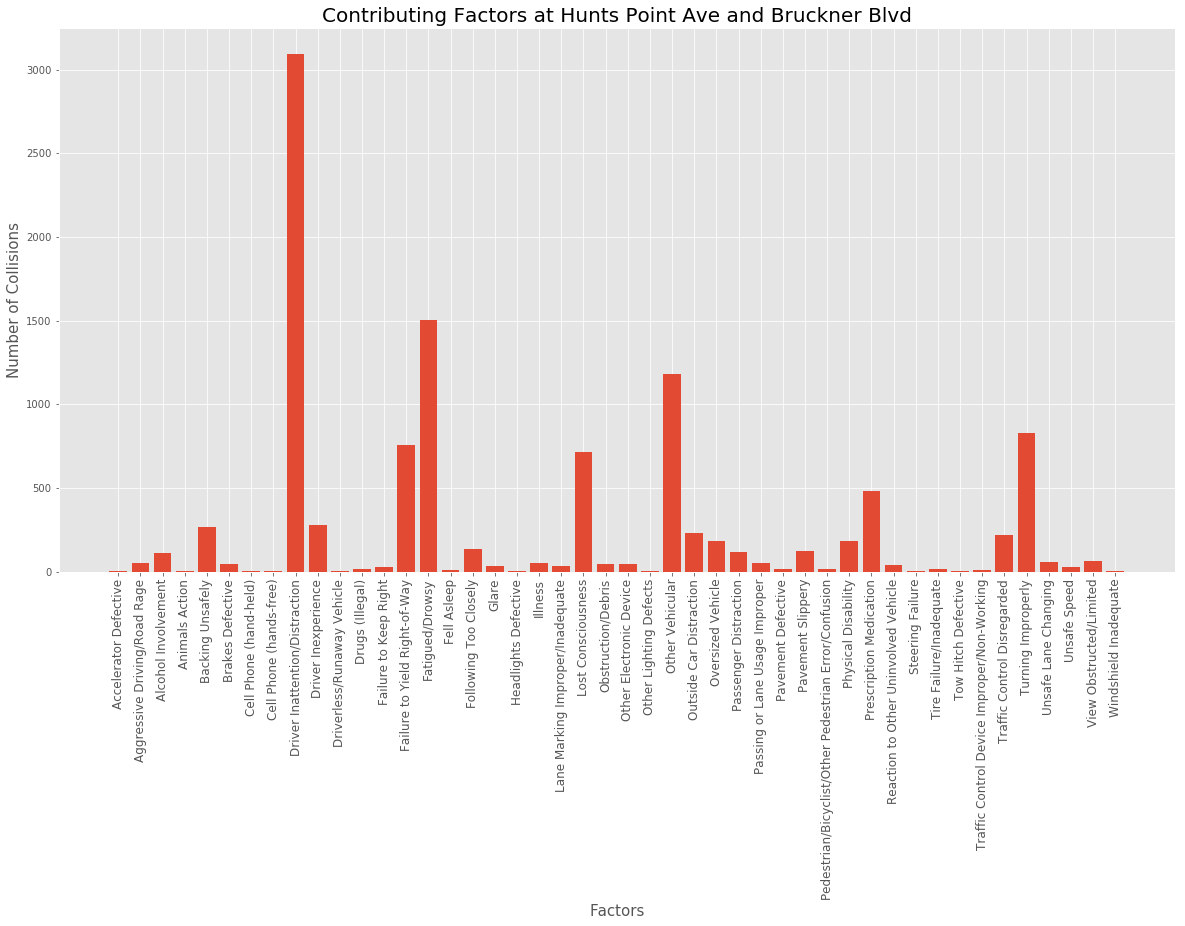

In [327]:
plt.bar(range(len(causes)), causes.values, align='center')
plt.xticks(range(len(causes)), causes.index.values, size='large', rotation='vertical')
plt.title('Contributing Factors at Hunts Point Ave and Bruckner Blvd', size=20)
plt.xlabel('Factors', size=15)
plt.ylabel('Number of Collisions', size=15)
plt.show()

In [36]:
coll = pd.read_csv('bike_coll_rate.csv', low_memory=False)

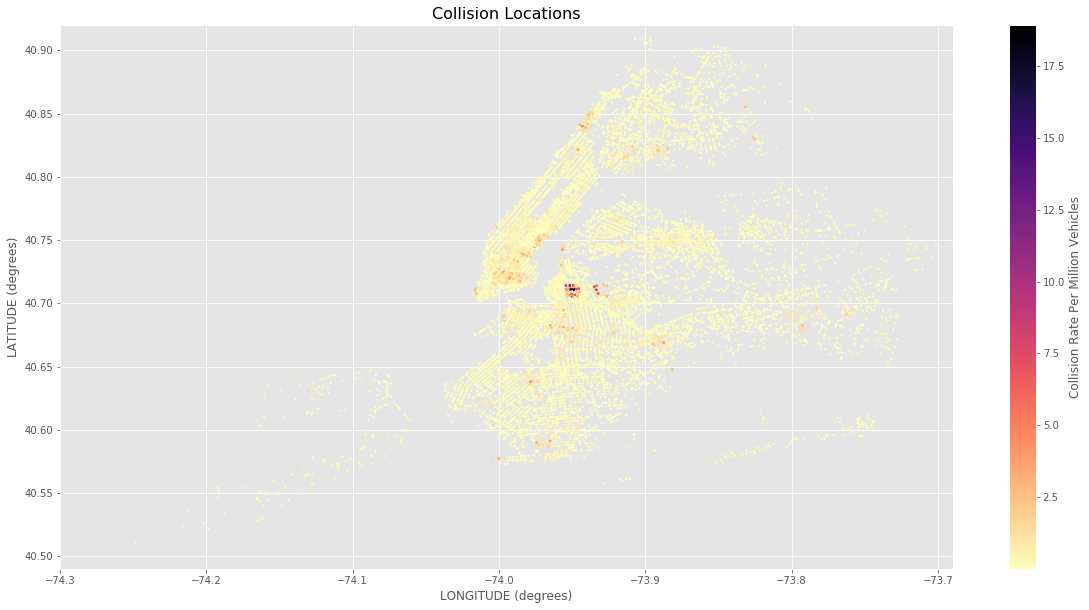

In [38]:
plt.scatter(coll['LONGITUDE'], coll['LATITUDE'], c=coll['Collision Rate'], s=3, cmap=plt.cm.magma_r)
plt.xlabel('LONGITUDE (degrees)', fontsize=12)
plt.ylabel('LATITUDE (degrees)', fontsize=12)
plt.title('Collision Locations', fontsize=16)
plt.ylim(40.49,40.92)
plt.xlim(-74.3,-73.69)
plt.colorbar(label='Collision Rate Per Million Vehicles')
plt.show()

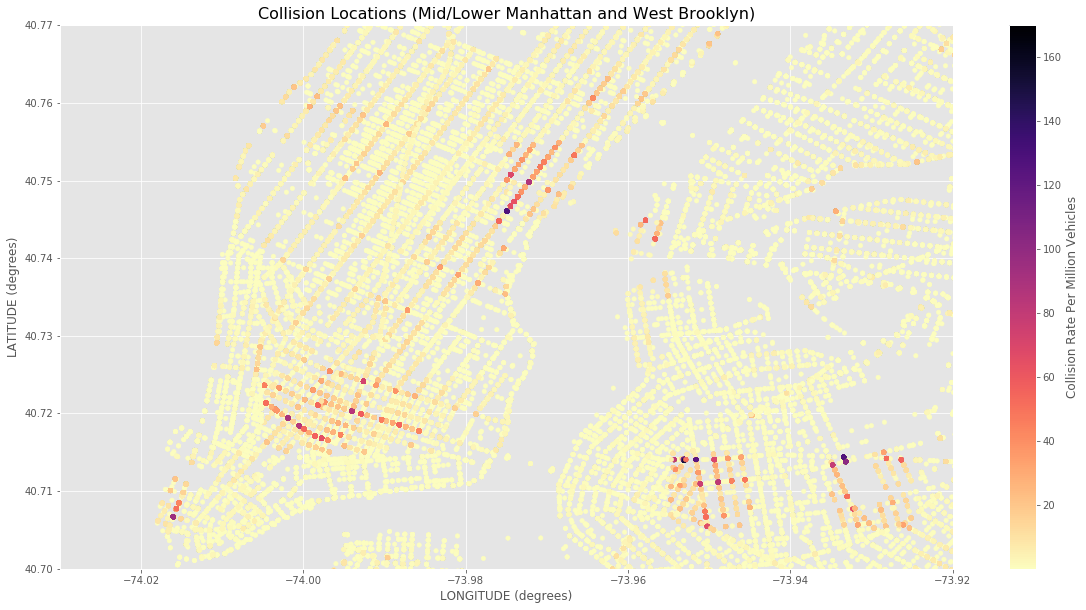

In [6]:
plt.scatter(coll['LONGITUDE'], coll['LATITUDE'], c=coll['Collision Rate'], s=20, cmap=plt.cm.magma_r)
plt.xlabel('LONGITUDE (degrees)', fontsize=12)
plt.ylabel('LATITUDE (degrees)', fontsize=12)
plt.title('Collision Locations (Mid/Lower Manhattan and West Brooklyn)', fontsize=16)
plt.ylim(40.7,40.77)
plt.xlim(-74.03,-73.92)
plt.colorbar(label='Collision Rate Per Million Vehicles')
plt.show()

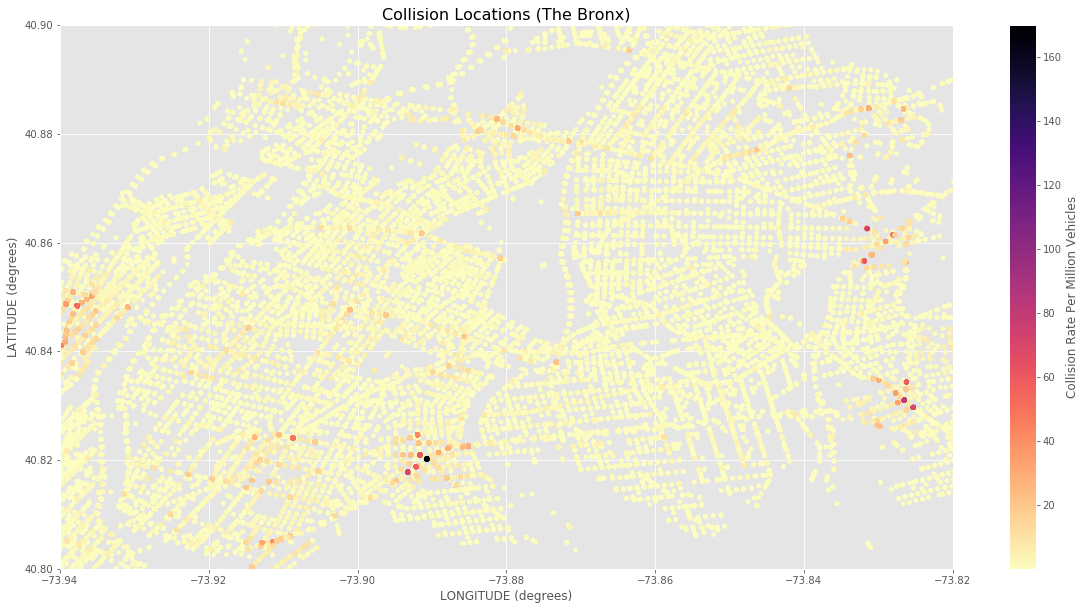

In [7]:
plt.scatter(coll['LONGITUDE'], coll['LATITUDE'], c=coll['Collision Rate'], s=20, cmap=plt.cm.magma_r)
plt.xlabel('LONGITUDE (degrees)', fontsize=12)
plt.ylabel('LATITUDE (degrees)', fontsize=12)
plt.title('Collision Locations (The Bronx)', fontsize=16)
plt.ylim(40.8,40.9)
plt.xlim(-73.94,-73.82)
plt.colorbar(label='Collision Rate Per Million Vehicles')
plt.show()